In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp
from matplotlib.patches import Rectangle
import matplotlib
import scipy
import scipy.signal as signal
import time
from tabulate import tabulate

In [2]:
# setup the plots
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure tit
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)
matplotlib.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure tit

# Import Data (log or no)

In [3]:
df = pd.read_excel('bgyord.xlsx', sheet_name = "wavelengths") # import data from excel sheet (variables correspond to column with that variable name)
wavelengths = df["wavelength"] 
blue = df["blue"]
green = df["green"]
yellow = df["yellow"]
orange = df["orange"]
red = df["red"]
dark_red = df["dark red"]
daylight = df["daylight"]
overcast = df["Sample Overcast"]
led2700 = df["Sample LED 2700 K"]
led4000 = df["Sample LED 4000 K"]
fluorescent2950 = df["Sample Fluorescent 2950 K"]
fluorescent4000 = df["Sample Fluorescent 4000 K"]
fluorescent6500 = df["Sample Fluorescent 6500 K"]
llred = df["llred"] #ll -> lighting lab
llwhite = df["llwhite"]
llamber = df["llamber"]
llgreen = df["llgreen"]
llcyan = df["llcyan"]
llblue = df["llblue"]
llindigo = df["llindigo"]
# df = pd.read_excel('sensitivity.xlsx', sheet_name = "sensitivity curves")
# bluenm = df["450 log scaled"]
# othernm = df["556 log scaled"]
# upper = df["upper log scaled"]
df = pd.read_excel('WELL EML ratio calculator to test SPD combinations for D22 fixtures.xlsx', sheet_name = "vorc") # import data from excel sheet
circadian = df["circadian"]
visual = df["visual"]
df = pd.read_excel('Color discrimination v2.xlsx', sheet_name = "Sheet1")
color1 = df["C1"]
color2 = df["C2"]
color3 = df["C3"]
color4 = df["C4"]
color5 = df["C5"]
color6 = df["C6"]
color7 = df["C7"]
color8 = df["C8"]
color9 = df["C9"]
color10 = df["C10"]
color11 = df["C11"]
color12 = df["C12"]
color13 = df["C13"]
color14 = df["C14"]
color15 = df["C15"]
color16 = df["C16"]
color17 = df["C17"]
color18 = df["C18"]
color19 = df["C19"]
color20 = df["C20"]
color21 = df["C21"]
color22 = df["C22"]
color23 = df["C23"]
color24 = df["C24"]

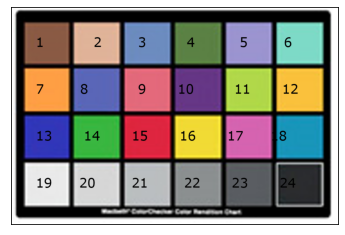

In [4]:
# color chart
fig, ax = plt.subplots()
image = plt.imread('color.png')
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

# New Optimization

In [5]:
# scale areas under the curves to all be the same 
blue_a = []
green_a = []
yellow_a = []
orange_a = []
red_a = []
dark_red_a = []
daylight_a = []
overcast_a = []
led2700_a = []
led4000_a = []
fluorescent2950_a = []
fluorescent4000_a = []
fluorescent6500_a = []
llred_a = []
llwhite_a = []
llamber_a = []
llgreen_a = []
llcyan_a = []
llblue_a = []
llindigo_a = []
    
for n in range(len(wavelengths)-1):
    blue_a += [blue[n]*(wavelengths[n+1]-wavelengths[n])]
    green_a += [green[n]*(wavelengths[n+1]-wavelengths[n])]
    yellow_a += [yellow[n]*(wavelengths[n+1]-wavelengths[n])]
    orange_a += [orange[n]*(wavelengths[n+1]-wavelengths[n])]
    red_a += [red[n]*(wavelengths[n+1]-wavelengths[n])]
    dark_red_a += [dark_red[n]*(wavelengths[n+1]-wavelengths[n])]
    daylight_a += [daylight[n]*(wavelengths[n+1]-wavelengths[n])]
    overcast_a += [overcast[n]*(wavelengths[n+1]-wavelengths[n])]
    led2700_a += [led2700[n]*(wavelengths[n+1]-wavelengths[n])]
    led4000_a += [led4000[n]*(wavelengths[n+1]-wavelengths[n])]
    fluorescent2950_a += [fluorescent2950[n]*(wavelengths[n+1]-wavelengths[n])]
    fluorescent4000_a += [fluorescent4000[n]*(wavelengths[n+1]-wavelengths[n])]
    fluorescent6500_a += [fluorescent6500[n]*(wavelengths[n+1]-wavelengths[n])]
    llred_a += [llred[n]*(wavelengths[n+1]-wavelengths[n])]
    llwhite_a += [llwhite[n]*(wavelengths[n+1]-wavelengths[n])]
    llamber_a += [llamber[n]*(wavelengths[n+1]-wavelengths[n])]
    llgreen_a += [llgreen[n]*(wavelengths[n+1]-wavelengths[n])]
    llcyan_a += [llcyan[n]*(wavelengths[n+1]-wavelengths[n])]
    llblue_a += [llblue[n]*(wavelengths[n+1]-wavelengths[n])]
    llindigo_a += [llindigo[n]*(wavelengths[n+1]-wavelengths[n])]
    
min_a = min(sum(blue_a), sum(green_a), sum(yellow_a), sum(orange_a), sum(red_a), sum(dark_red_a), sum(daylight_a), 
                                           sum(overcast_a), sum(led2700_a), sum(led4000_a), sum(fluorescent2950_a),
                                           sum(fluorescent4000_a), sum(fluorescent6500_a), sum(llred_a), sum(llwhite_a), 
                                           sum(llamber_a), sum(llgreen_a), sum(llcyan_a), sum(llblue_a), sum(llindigo_a))

blue = blue*(min_a/sum(blue_a))
green = green*(min_a/sum(green_a))
yellow = yellow*(min_a/sum(yellow_a))
orange = orange*(min_a/sum(orange_a))
red = red*(min_a/sum(red_a))
dark_red = dark_red*(min_a/sum(dark_red_a))
daylight = daylight*(min_a/sum(daylight_a))
overcast = overcast*(min_a/sum(overcast_a))
led2700 = led2700*(min_a/sum(led2700_a))
led4000 = led4000*(min_a/sum(led4000_a))
fluorescent2950 = fluorescent2950*(min_a/sum(fluorescent2950_a))
fluorescent4000 = fluorescent4000*(min_a/sum(fluorescent4000_a))
fluorescent6500 = fluorescent6500*(min_a/sum(fluorescent6500_a))
llred = llred*(min_a/sum(llred_a))
llwhite = llwhite*(min_a/sum(llwhite_a))
llamber = llamber*(min_a/sum(llamber_a))
llgreen = llgreen*(min_a/sum(llgreen_a))
llcyan = llcyan*(min_a/sum(llcyan_a))
llblue = llblue*(min_a/sum(llblue_a))
llindigo = llindigo*(min_a/sum(llindigo_a))

In [6]:
# inputs
color = color19 # color# from chart above
vorc = circadian # visual or circadian
doro = daylight # daylight or overcast

In [7]:
# convolving light, reflectance, and signal (visual or circadian)
m = "same"
# print("blue:", blue, len(blue), "\n")
# print("color:", color, len(color), "\n")
blue_c1 = np.convolve(blue, color, mode=m)
# print("blue_c1:", blue_c1, len(blue_c1), "\n")
# print("vorc:", vorc, len(vorc), "\n")
blue_c = np.convolve(blue_c1, vorc, mode=m)
# print("blue_c:", blue_c, len(blue_c))
green_c1 = signal.convolve(green, color, mode=m)
green_c = signal.convolve(green_c1, vorc, mode=m)
yellow_c1 = signal.convolve(yellow, color, mode=m)
yellow_c = signal.convolve(yellow_c1, vorc, mode=m)
orange_c1 = signal.convolve(orange, color, mode=m)
orange_c = signal.convolve(orange_c1, vorc, mode=m)
red_c1 = signal.convolve(red, color, mode=m)
red_c = signal.convolve(red_c1, vorc, mode=m)
dark_red_c1 = signal.convolve(dark_red, color, mode=m)
dark_red_c = signal.convolve(dark_red_c1, vorc, mode=m)
llred_c1 = signal.convolve(llred, color, mode=m)
llred_c = signal.convolve(llred_c1, vorc, mode=m)
llwhite_c1 = signal.convolve(llwhite, color, mode=m)
llwhite_c = signal.convolve(llwhite_c1, vorc, mode=m)
llamber_c1 = signal.convolve(llamber, color, mode=m)
llamber_c = signal.convolve(llamber_c1, vorc, mode=m)
llgreen_c1 = signal.convolve(llgreen, color, mode=m)
llgreen_c = signal.convolve(llgreen_c1, vorc, mode=m)
llcyan_c1 = signal.convolve(llcyan, color, mode=m)
llcyan_c = signal.convolve(llcyan_c1, vorc, mode=m)
llblue_c1 = signal.convolve(llblue, color, mode=m)
llblue_c = signal.convolve(llblue_c1, vorc, mode=m)
llindigo_c1 = signal.convolve(llindigo, color, mode=m)
llindigo_c = signal.convolve(llindigo_c1, vorc, mode=m)
doro_c1 = signal.convolve(doro, color, mode=m)
doro_c = signal.convolve(doro_c1, vorc, mode=m)
led2700_c1 = signal.convolve(led2700, color, mode=m)
led2700_c = signal.convolve(led2700_c1, vorc, mode=m)
led4000_c1 = signal.convolve(led4000, color, mode=m)
led4000_c = signal.convolve(led4000_c1, vorc, mode=m)
fluorescent2950_c1 = signal.convolve(fluorescent2950, color, mode=m)
fluorescent2950_c = signal.convolve(fluorescent2950_c1, vorc, mode=m)
fluorescent4000_c1 = signal.convolve(fluorescent4000, color, mode=m)
fluorescent4000_c = signal.convolve(fluorescent4000_c1, vorc, mode=m)
fluorescent6500_c1 = signal.convolve(fluorescent6500, color, mode=m)
fluorescent6500_c = signal.convolve(fluorescent6500_c1, vorc, mode=m)

In [8]:
b = cp.Variable(integer=True)
g = cp.Variable(integer=True)
y = cp.Variable(integer=True)
o = cp.Variable(integer=True)
r = cp.Variable(integer=True)
dr = cp.Variable(integer=True)
llr = cp.Variable(integer=True)
llw = cp.Variable(integer=True)
lla = cp.Variable(integer=True)
llg = cp.Variable(integer=True)
llc = cp.Variable(integer=True)
llb = cp.Variable(integer=True)
lli = cp.Variable(integer=True)
dorov = cp.Variable(integer=True) # daylight or overcast variable
led2 = cp.Variable(integer=True)
led4 = cp.Variable(integer=True)
flu2 = cp.Variable(integer=True)
flu4 = cp.Variable(integer=True)
flu6 = cp.Variable(integer=True)

In [9]:
constraints = []
constraints += [b >= 0]
constraints += [g >= 0]
constraints += [y >= 0]
constraints += [o >= 0]
constraints += [r >= 0]
constraints += [dr >= 0]
constraints += [llr >= 0]
constraints += [llw >= 0]
constraints += [lla >= 0]
constraints += [llg >= 0]
constraints += [llc >= 0]
constraints += [llb >= 0]
constraints += [lli >= 0]
constraints += [led2 >= 0]
constraints += [led4 >= 0]
constraints += [flu2 >= 0]
constraints += [flu4 >= 0]
constraints += [flu6 >= 0]
constraints += [b <= 255]
constraints += [g <= 255]
constraints += [y <= 255]
constraints += [o <= 255]
constraints += [r <= 255]
constraints += [dr <= 255]
constraints += [llr <= 255]
constraints += [llw <= 255]
constraints += [lla <= 255]
constraints += [llg <= 255]
constraints += [llc <= 255]
constraints += [llb <= 255]
constraints += [lli <= 255]
constraints += [led2 <= 255]
constraints += [led4 <= 255]
constraints += [flu2 <= 255]
constraints += [flu4 <= 255]
constraints += [flu6 <= 255]

constraints += [dorov == 255] #daylight fixed at very bright

In [10]:
diff_led2 = []
diff_led4 = []
diff_flu2 = []
diff_flu4 = []
diff_flu6 = []
diff_some = []
diff_most = []
diff_all = []
for n in range(len(wavelengths)-1):
    diff_led2 += [((wavelengths[n+1]-wavelengths[n])*((doro_c[n]*dorov) - (cp.multiply(led2, led2700_c[n]))))**2]
    
    diff_led4 += [((wavelengths[n+1]-wavelengths[n])*((doro_c[n]*dorov) - (cp.multiply(led4, led4000_c[n]))))**2]
    
    diff_flu2 += [((wavelengths[n+1]-wavelengths[n])*((doro_c[n]*dorov) - (cp.multiply(flu2, fluorescent2950_c[n]))))**2]
    
    diff_flu4 += [((wavelengths[n+1]-wavelengths[n])*((doro_c[n]*dorov) - (cp.multiply(flu4, fluorescent4000_c[n]))))**2]
    
    diff_flu6 += [((wavelengths[n+1]-wavelengths[n])*((doro_c[n]*dorov) - (cp.multiply(flu6, fluorescent6500_c[n]))))**2]
    
    diff_some += [((wavelengths[n+1]-wavelengths[n])*((doro_c[n]*dorov) - (cp.multiply(b, blue_c[n]) + 
                cp.multiply(g, green_c[n]) + cp.multiply(y, yellow_c[n]) + cp.multiply(o, orange_c[n]) + 
                cp.multiply(r, red_c[n]) + cp.multiply(dr, dark_red_c[n]) + cp.multiply(llr, llred_c[n]) + 
                cp.multiply(llg, llgreen_c[n]) + cp.multiply(llc, llcyan_c[n]) + cp.multiply(llb, llblue_c[n]) + 
                cp.multiply(lli, llindigo_c[n]))))**2]
    
    diff_most += [((wavelengths[n+1]-wavelengths[n])*((doro_c[n]*dorov) - (cp.multiply(b, blue_c[n]) + 
                cp.multiply(g, green_c[n]) + cp.multiply(y, yellow_c[n]) + cp.multiply(o, orange_c[n]) + 
                cp.multiply(r, red_c[n]) + cp.multiply(dr, dark_red_c[n]) + cp.multiply(llr, llred_c[n]) + 
                cp.multiply(llw, llwhite_c[n]) + cp.multiply(lla, llamber_c[n]) + cp.multiply(llg, llgreen_c[n]) + 
                cp.multiply(llc, llcyan_c[n]) + cp.multiply(llb, llblue_c[n]) + cp.multiply(lli, llindigo_c[n]))))**2]
    
    diff_all += [((wavelengths[n+1]-wavelengths[n])*((doro_c[n]*dorov) - (cp.multiply(b, blue_c[n]) + 
                cp.multiply(g, green_c[n]) + cp.multiply(y, yellow_c[n]) + cp.multiply(o, orange_c[n]) + 
                cp.multiply(r, red_c[n]) + cp.multiply(dr, dark_red_c[n]) + cp.multiply(llr, llred_c[n]) + 
                cp.multiply(llw, llwhite_c[n]) + cp.multiply(lla, llamber_c[n]) + cp.multiply(llg, llgreen_c[n]) + 
                cp.multiply(llc, llcyan_c[n]) + cp.multiply(llb, llblue_c[n]) + cp.multiply(lli, llindigo_c[n]) + 
                cp.multiply(led2, led2700_c[n]) + cp.multiply(led4, led4000_c[n]) + 
                cp.multiply(flu2, fluorescent2950_c[n]) + cp.multiply(flu4, fluorescent4000_c[n]) + 
                cp.multiply(flu6, fluorescent6500_c[n]))))**2]

In [11]:
b_stor = []
g_stor = []
y_stor = []
o_stor = []
r_stor = []
dr_stor = []
llr_stor = []
llw_stor = []
lla_stor = []
llg_stor = []
llc_stor = []
llb_stor = []
lli_stor = []
dorov_stor = []
led2_stor = []
led4_stor = []
flu2_stor = []
flu4_stor = []
flu6_stor = []

objs = {
    'Led 2700 K': cp.Minimize(cp.sum(diff_led2)),
    'Led 4000 K': cp.Minimize(cp.sum(diff_led4)),
    'Fluorescent 2950': cp.Minimize(cp.sum(diff_flu2)),
    'Fluorescent 4000': cp.Minimize(cp.sum(diff_flu4)),
    'Fluorescent 6500': cp.Minimize(cp.sum(diff_flu6)),
    'Optimized without LED/Fluorescent/LLW/LLA': cp.Minimize(cp.sum(diff_some)),
    'Optimized without LED/Fluorescent Options': cp.Minimize(cp.sum(diff_most)),
    'Optimized with All Lights Available': cp.Minimize(cp.sum(diff_all))
}

names = list(objs.keys())

for k,v in objs.items(): # cycle through individual objectives for each test case
    print("OBJECTIVE",k)
    start_time = time.time()
    
    obj = v
    prob = cp.Problem(obj, constraints)
    prob.solve()
#     prob.solve(solver=cp.GUROBI, reoptimize=True)
    print("status:", prob.status)
    print("difference:", prob.value)
    
    # store some stuff
    b_stor += [b.value]
    g_stor += [g.value]
    y_stor += [y.value]
    o_stor += [o.value]
    r_stor += [r.value]
    dr_stor += [dr.value]
    llr_stor += [llr.value]
    llw_stor += [llw.value]
    lla_stor += [lla.value]
    llg_stor += [llg.value]
    llc_stor += [llc.value]
    llb_stor += [llb.value]
    lli_stor += [lli.value]
    dorov_stor += [dorov.value]
    led2_stor += [led2.value]
    led4_stor += [led4.value]
    flu2_stor += [flu2.value]
    flu4_stor += [flu4.value]
    flu6_stor += [flu6.value]
    
    end_time = time.time()
    print("TIME: ", end_time-start_time)

OBJECTIVE Led 2700 K
Set parameter Username
Academic license - for non-commercial use only - expires 2024-07-29
status: optimal
difference: 8055607.838143194
TIME:  0.10740399360656738
OBJECTIVE Led 4000 K
status: optimal
difference: 840408.0792906513
TIME:  0.10506892204284668
OBJECTIVE Fluorescent 2950
status: optimal
difference: 4076826.1682903203
TIME:  0.1056675910949707
OBJECTIVE Fluorescent 4000
status: optimal
difference: 5984260.593804356
TIME:  0.14925551414489746
OBJECTIVE Fluorescent 6500
status: optimal
difference: 4415698.556940543
TIME:  0.1045982837677002
OBJECTIVE Optimized without LED/Fluorescent/LLW/LLA
status: optimal
difference: 219746.07686355957
TIME:  0.32073140144348145
OBJECTIVE Optimized without LED/Fluorescent Options
status: optimal
difference: 202197.44843130506
TIME:  0.2391345500946045
OBJECTIVE Optimized with All Lights Available
status: optimal
difference: 61873.68879860837
TIME:  0.5834517478942871


In [12]:
table = [['Light Source', 'LED 2', 'LED 4', 'Flu 2', 'Flu 4', 'Flu 6', 'Opt Some', 'Opt Most', 'Opt All'], 
         ['Daylight Value (0-255)'] + [dorov_stor[0]] + [dorov_stor[1]] + [dorov_stor[2]] + [dorov_stor[3]] + [dorov_stor[4]] + [dorov_stor[5]] + [dorov_stor[6]] + [dorov_stor[7]],
         ['Blue (0-255)'] + [b_stor[0]] + [b_stor[1]] + [b_stor[2]] + [b_stor[3]] + [b_stor[4]] + [b_stor[5]] + [b_stor[6]] + [b_stor[7]], 
         ['Green (0-255)'] + [g_stor[0]] + [g_stor[1]] + [g_stor[2]] + [g_stor[3]] + [g_stor[4]] + [g_stor[5]] + [g_stor[6]] + [g_stor[7]],
         ['Yellow (0-255)'] + [y_stor[0]] + [y_stor[1]] + [y_stor[2]] + [y_stor[3]] + [y_stor[4]] + [y_stor[5]] + [y_stor[6]] + [y_stor[7]],
         ['Orange (0-255)'] + [o_stor[0]] + [o_stor[1]] + [o_stor[2]] + [o_stor[3]] + [o_stor[4]] + [o_stor[5]] + [o_stor[6]] + [o_stor[7]],
         ['Red (0-255)'] + [r_stor[0]] + [r_stor[1]] + [r_stor[2]] + [r_stor[3]] + [r_stor[4]] + [r_stor[5]] + [r_stor[6]] + [r_stor[7]],
         ['Dark Red (0-255)'] + [dr_stor[0]] + [dr_stor[1]] + [dr_stor[2]] + [dr_stor[3]] + [dr_stor[4]] + [dr_stor[5]] + [dr_stor[6]] + [dr_stor[7]],
         ['Lighting Lab Red (0-255)'] + [llr_stor[0]] + [llr_stor[1]] + [llr_stor[2]] + [llr_stor[3]] + [llr_stor[4]] + [llr_stor[5]] + [llr_stor[6]] + [llr_stor[7]],
         ['Lighting Lab White (0-255)'] + [llw_stor[0]] + [llw_stor[1]] + [llw_stor[2]] + [llw_stor[3]] + [llw_stor[4]] + [llw_stor[5]] + [llw_stor[6]] + [llw_stor[7]],
         ['Lighting Lab Amber (0-255)'] + [lla_stor[0]] + [lla_stor[1]] + [lla_stor[2]] + [lla_stor[3]] + [lla_stor[4]] + [lla_stor[5]] + [lla_stor[6]] + [lla_stor[7]],
         ['Lighting Lab Green (0-255)'] + [llg_stor[0]] + [llg_stor[1]] + [llg_stor[2]] + [llg_stor[3]] + [llg_stor[4]] + [llg_stor[5]] + [llg_stor[6]] + [llg_stor[7]],
         ['Lighting Lab Cyan (0-255)'] + [llc_stor[0]] + [llc_stor[1]] + [llc_stor[2]] + [llc_stor[3]] + [llc_stor[4]] + [llc_stor[5]] + [llc_stor[6]] + [llc_stor[7]],
         ['Lighting Lab Blue (0-255)'] + [llb_stor[0]] + [llb_stor[1]] + [llb_stor[2]] + [llb_stor[3]] + [llb_stor[4]] + [llb_stor[5]] + [llb_stor[6]] + [llb_stor[7]],
         ['Lighitng Lab Indigo (0-255)'] + [lli_stor[0]] + [lli_stor[1]] + [lli_stor[2]] + [lli_stor[3]] + [lli_stor[4]] + [lli_stor[5]] + [lli_stor[6]] + [lli_stor[7]],
         ['LED 2700 K (0-255)'] + [led2_stor[0]] + [led2_stor[1]] + [led2_stor[2]] + [led2_stor[3]] + [led2_stor[4]] + [led2_stor[5]] + [led2_stor[6]] + [led2_stor[7]],
         ['LED 4000 K (0-255)'] + [led4_stor[0]] + [led4_stor[1]] + [led4_stor[2]] + [led4_stor[3]] + [led4_stor[4]] + [led4_stor[5]] + [led4_stor[6]] + [led4_stor[7]],
         ['Fluorescent 2950K (0-255)'] + [flu2_stor[0]] + [flu2_stor[1]] + [flu2_stor[2]] + [flu2_stor[3]] + [flu2_stor[4]] + [flu2_stor[5]] + [flu2_stor[6]] + [flu2_stor[7]],
         ['Fluorescent 4000K (0-255)'] + [flu4_stor[0]] + [flu4_stor[1]] + [flu4_stor[2]] + [flu4_stor[3]] + [flu4_stor[4]] + [flu4_stor[5]] + [flu4_stor[6]] + [flu4_stor[7]],
         ['Fluorescent 6500K (0-255)'] + [flu6_stor[0]] + [flu6_stor[1]] + [flu6_stor[2]] + [flu6_stor[3]] + [flu6_stor[4]] + [flu6_stor[5]] + [flu6_stor[6]] + [flu6_stor[7]],
        ]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))#solve and print
print("\n")

╒═════════════════════════════╤═════════╤═════════╤═════════╤═════════╤═════════╤════════════╤════════════╤═══════════╕
│ Light Source                │   LED 2 │   LED 4 │   Flu 2 │   Flu 4 │   Flu 6 │   Opt Some │   Opt Most │   Opt All │
╞═════════════════════════════╪═════════╪═════════╪═════════╪═════════╪═════════╪════════════╪════════════╪═══════════╡
│ Daylight Value (0-255)      │     255 │     255 │     255 │     255 │     255 │        255 │        255 │       255 │
├─────────────────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────────┼────────────┼───────────┤
│ Blue (0-255)                │      -0 │      -0 │      -0 │      -0 │      -0 │         -0 │         -0 │        13 │
├─────────────────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────────┼────────────┼───────────┤
│ Green (0-255)               │      -0 │      -0 │      -0 │      -0 │      -0 │        100 │         31 │        -0 │
├─────────────────────────────┼─────────

the table shows the different objectives. 
in led 2, we compare the 2700 k led with daylight. 
in led 4, we compare the 4000k led with daylight. 
in flu 2, we compare the 2950k fluorescent with daylight. 
in flu 4, we compare the 4000 k fluorescent with daylight. 
in flu 6, we compare the 6500 k fluorescent with daylight.
in opt some, we compare the color lights from the initial problem months ago and the lighting lab with daylight.
in opt most, we add in the white and amber from the lighting lab.
in opt all, we consider all the light sources compared with daylight. 

in all cases, there should be a reflection and visual/circadian accounted for. vorc is the variable to choose visual or circadian. color is the variable to choose what color swatch from the chart (color19 right now, white). daylight is at 255 (max) and the other values can vary between 0-255. the difference between daylight and the other colors is squared.

<BarContainer object of 70 artists>

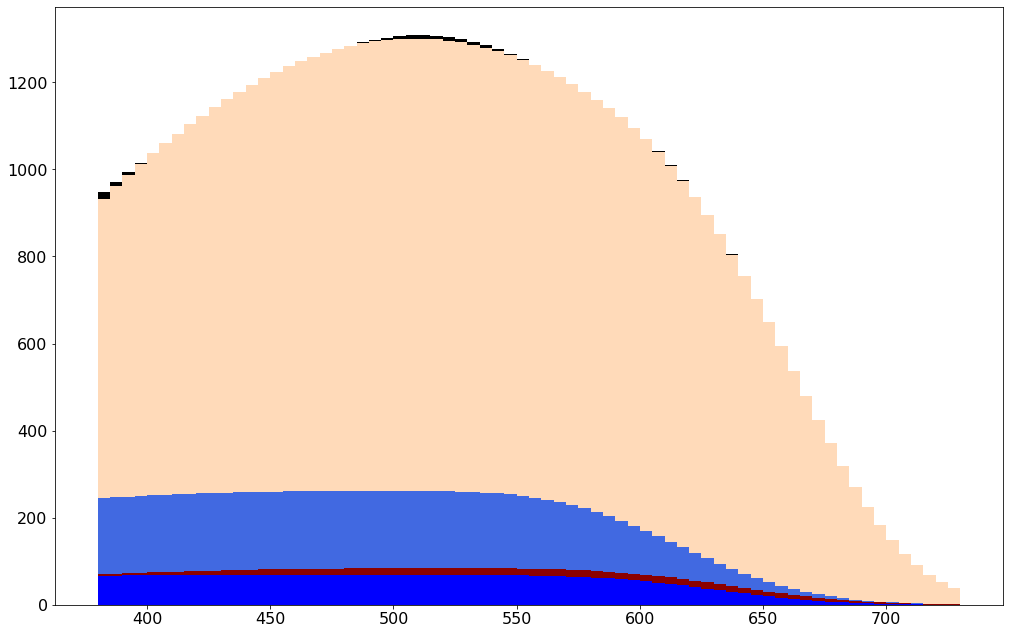

In [13]:
# plotting
val=7 # objective # where led 2 is 0 and opt all is 7
bl = []
for n in range(len(wavelengths)-1):
    bl += [b_stor[val]*blue_c[n]]
gr = []
gr_p = []
for n in range(len(wavelengths)-1):
    gr += [g_stor[val]*green_c[n]]
    gr_p += [gr[n] + bl[n]]
ye = []
ye_p = []
for n in range(len(wavelengths)-1):
    ye += [y_stor[val]*yellow_c[n]]
    ye_p += [ye[n] + gr_p[n]]
ora = []
ora_p = []
for n in range(len(wavelengths)-1):
    ora += [o_stor[val]*orange_c[n]]
    ora_p += [ora[n] + ye_p[n]]
re = []
re_p = []
for n in range(len(wavelengths)-1):
    re += [r_stor[val]*red_c[n]]
    re_p += [re[n] + ora_p[n]]
dar = []
dar_p = []
for n in range(len(wavelengths)-1):
    dar += [dr_stor[val]*dark_red_c[n]]
    dar_p += [dar[n] + re_p[n]]
llre = []
llre_p = []
for n in range(len(wavelengths)-1):
    llre += [llr_stor[val]*llred_c[n]]
    llre_p += [llre[n] + dar_p[n]]
llwh = []
llwh_p = []
for n in range(len(wavelengths)-1):
    llwh += [llw_stor[val]*llwhite_c[n]]
    llwh_p += [llwh[n] + llre_p[n]]
llam = []
llam_p = []
for n in range(len(wavelengths)-1):
    llam += [lla_stor[val]*llamber_c[n]]
    llam_p += [llam[n] + llwh_p[n]]
llgr = []
llgr_p = []
for n in range(len(wavelengths)-1):
    llgr += [llg_stor[val]*llgreen_c[n]]
    llgr_p += [llgr[n] + llam_p[n]]
llcy = []
llcy_p = []
for n in range(len(wavelengths)-1):
    llcy += [llc_stor[val]*llcyan_c[n]]
    llcy_p += [llcy[n] + llgr_p[n]]
llbl = []
llbl_p = []
for n in range(len(wavelengths)-1):
    llbl += [llb_stor[val]*llblue_c[n]]
    llbl_p += [llbl[n] + llre_p[n]]
llin = []
llin_p = []
for n in range(len(wavelengths)-1):
    llin += [lli_stor[val]*llindigo_c[n]]
    llin_p += [llin[n] + llbl_p[n]]
led27 = []
led27_p = []
for n in range(len(wavelengths)-1):
    led27 += [led2_stor[val]*led2700_c[n]]
    led27_p += [led27[n] + llin_p[n]]
led40 = []
led40_p = []
for n in range(len(wavelengths)-1):
    led40 += [led4_stor[val]*led4000_c[n]]
    led40_p += [led40[n] + led27_p[n]]  
flu29 = []
flu29_p = []
for n in range(len(wavelengths)-1):
    flu29 += [flu2_stor[val]*fluorescent2950_c[n]]
    flu29_p += [flu29[n] + led40_p[n]]
flu40 = []
flu40_p = []
for n in range(len(wavelengths)-1):
    flu40 += [flu4_stor[val]*fluorescent4000_c[n]]
    flu40_p += [flu40[n] + flu29_p[n]]
flu65 = []
for n in range(len(wavelengths)-1):
    flu65 += [flu6_stor[val]*fluorescent6500_c[n]]
dorove = []
for n in range(len(wavelengths)-1):
    dorove += [dorov_stor[val]*doro_c[n]]
width = []
for n in range((len(wavelengths))-1):
    width += [wavelengths[n+1]-wavelengths[n]]

fig, ax = plt.subplots(figsize=(17,11))
    
ax.bar(wavelengths[:-1], dorove, width, color="black", align='edge', label="daylight")
ax.bar(wavelengths[:-1], bl, width, color="blue", alpha = 1, align='edge', label="blue")
ax.bar(wavelengths[:-1], gr, width, bottom=bl, color="green", alpha = 1, align='edge', label="green")
ax.bar(wavelengths[:-1], ye, width, bottom=gr_p, color="gold", alpha = 1, align='edge', label="yellow")
ax.bar(wavelengths[:-1], ora, width, bottom=ye_p, color="orange", alpha = 1, align='edge', label="orange")
ax.bar(wavelengths[:-1], re, width, bottom=ora_p, color="red", alpha = 1, align='edge', label="red")
ax.bar(wavelengths[:-1], dar, width, bottom=re_p, color="darkred", alpha = 1, align='edge', label="dark red")
ax.bar(wavelengths[:-1], llre, width, bottom=dar_p, color="firebrick", alpha = 1, align='edge', label="lighting lab red")
ax.bar(wavelengths[:-1], llwh, width, bottom=llre_p, color="lightgray", alpha = 1, align='edge', label="lighting lab white")
ax.bar(wavelengths[:-1], llam, width, bottom=llwh_p, color="yellow", alpha = 1, align='edge', label="lighting lab amber")
ax.bar(wavelengths[:-1], llgr, width, bottom=llam_p, color="yellowgreen", alpha = 1, align='edge', label="lighting lab green")
ax.bar(wavelengths[:-1], llcy, width, bottom=llgr_p, color="cyan", alpha = 1, align='edge', label="lighting lab cyan")
ax.bar(wavelengths[:-1], llbl, width, bottom=llcy_p, color="royalblue", alpha = 1, align='edge', label="lighting lab blue")
ax.bar(wavelengths[:-1], llin, width, bottom=llbl_p, color="midnightblue", alpha = 1, align='edge', label="lighting lab indigo")
ax.bar(wavelengths[:-1], led27, width, bottom=llin_p, color="lightyellow", alpha = 1, align='edge', label="led 2700")
ax.bar(wavelengths[:-1], led40, width, bottom=led27_p, color="aliceblue", alpha = 1, align='edge', label="led 4000")
ax.bar(wavelengths[:-1], flu29, width, bottom=led40_p, color="peachpuff", alpha = 1, align='edge', label="fluorescent 2950")
ax.bar(wavelengths[:-1], flu40, width, bottom=flu29_p, color="linen", alpha = 1, align='edge', label="fluorescent 4000")
ax.bar(wavelengths[:-1], flu65, width, bottom=flu40_p, color="paleturquoise", alpha = 1, align='edge', label="fluorescent 6500")


# Old Optimization

In [14]:
# fig, ax = plt.subplots(figsize=(17,11))

# width = []
# for n in range((len(wavelengths))-1):
#     width += [wavelengths[n+1]-wavelengths[n]]
    
# # ax.bar(wavelengths[:-1], daylight[:-1], width, color="lightgray", align='edge', label="daylight")
# ax.bar(wavelengths[:-1], blue[:-1], width, color="blue", align='edge', label="blue")
# ax.bar(wavelengths[:-1], green[:-1], width, bottom=blue[:-1], color="green", align='edge', label="green")
# ax.bar(wavelengths[:-1], yellow[:-1], width, bottom=blue[:-1]+green[:-1], color="gold", align='edge', label="yellow")
# ax.bar(wavelengths[:-1], orange[:-1], width, bottom=blue[:-1]+green[:-1]+yellow[:-1], color="orange", align='edge', label="orange")
# ax.bar(wavelengths[:-1], red[:-1], width, bottom=blue[:-1]+green[:-1]+yellow[:-1]+orange[:-1], color="red", align='edge', label="red")
# ax.bar(wavelengths[:-1], dark_red[:-1], width, bottom=blue[:-1]+green[:-1]+yellow[:-1]+orange[:-1]+red[:-1], color="darkred", align='edge', label="dark red")
# # ax.bar(wavelengths[:-1], bluenm[:-1], width, color="black", align='edge', label="450 nm")
# # ax.bar(wavelengths[:-1], othernm[:-1], width, color="black", align='edge', label="556 nm")
# # ax.add_patch(Rectangle((480,0), 20, 1.4,edgecolor="black", fill=None))
# # ax.add_patch(Rectangle((550,0), 30, 1.4,edgecolor="black", fill=None, label="Undesired Wavelength Range"))
# # plt.plot(wavelengths[:-1], bluenm[:-1], color="black", label="450 nm log sensitivity")
# # plt.plot(wavelengths[:-1], othernm[:-1], color="black", label="556 nm log sensitivity")
# ax.set_ylabel('Intensity of Each Color')
# ax.set_xlabel('Wavelength')
# ax.set_title('Color by Wavelength')
# ax.legend(loc="upper left")
# plt.show()

In [15]:
# fig, ax = plt.subplots(figsize=(17,11))

# width = []
# for n in range((len(wavelengths))-1):
#     width += [wavelengths[n+1]-wavelengths[n]]

# ax.bar(wavelengths[:-1], daylight[:-1]*upper[:-1], width, color="lightgray", align='edge', label="daylight")
# ax.bar(wavelengths[:-1], blue[:-1]*upper[:-1], width, color="blue", align='edge', label="blue")
# ax.bar(wavelengths[:-1], green[:-1]*upper[:-1], width, bottom=blue[:-1]*upper[:-1], color="green", align='edge', label="green")
# ax.bar(wavelengths[:-1], yellow[:-1]*upper[:-1], width, bottom=blue[:-1]*upper[:-1]+green[:-1]*upper[:-1], color="gold", align='edge', label="yellow")
# ax.bar(wavelengths[:-1], orange[:-1]*upper[:-1], width, bottom=blue[:-1]*upper[:-1]+green[:-1]*upper[:-1]+yellow[:-1]*upper[:-1], color="orange", align='edge', label="orange")
# ax.bar(wavelengths[:-1], red[:-1]*upper[:-1], width, bottom=blue[:-1]*upper[:-1]+green[:-1]*upper[:-1]+yellow[:-1]*upper[:-1]+orange[:-1]*upper[:-1], color="red", align='edge', label="red")
# ax.bar(wavelengths[:-1], dark_red[:-1]*upper[:-1], width, bottom=blue[:-1]*upper[:-1]+green[:-1]*upper[:-1]+yellow[:-1]*upper[:-1]+orange[:-1]*upper[:-1]+red[:-1]*upper[:-1], color="darkred", align='edge', label="dark red")
# # ax.bar(wavelengths[:-1], bluenm[:-1], width, color="black", align='edge', label="450 nm")
# # ax.bar(wavelengths[:-1], othernm[:-1], width, color="black", align='edge', label="556 nm")
# # ax.add_patch(Rectangle((480,0), 20, 1.4,edgecolor="black", fill=None))
# # ax.add_patch(Rectangle((550,0), 30, 1.4,edgecolor="black", fill=None, label="Undesired Wavelength Range"))
# # plt.plot(wavelengths[:-1], bluenm[:-1], color="black", label="450 nm log sensitivity")
# # plt.plot(wavelengths[:-1], othernm[:-1], color="black", label="556 nm log sensitivity")
# ax.set_ylabel('Intensity of Each Color')
# ax.set_xlabel('Wavelength')
# ax.set_title('Color by Wavelength Accounting for Vison Perception (Upper)')
# ax.legend(loc="upper left")
# plt.show()

In [16]:
# cones = bluenm + othernm

## Upper vs Daylight (not squared)

In [17]:
# # multiply curves by these variables to find how many of each you want
# b = cp.Variable(integer=True)
# g = cp.Variable(integer=True)
# y = cp.Variable(integer=True)
# o = cp.Variable(integer=True)
# r = cp.Variable(integer=True)
# dr = cp.Variable(integer=True)

# constraints = []
# constraints += [b >= 0]
# constraints += [g >= 0]
# constraints += [y >= 0]
# constraints += [o >= 0]
# constraints += [r >= 0]
# constraints += [dr >= 0]
# constraints += [b <= 255]
# constraints += [g <= 255]
# constraints += [y <= 255]
# constraints += [o <= 255]
# constraints += [r <= 255]
# constraints += [dr <= 255]

# # difference between daylight and actual curves
# # using squared because i want to minimize this difference
# diff = []
# for n in range(len(wavelengths)-1):
#     diff += [((wavelengths[n+1]-wavelengths[n])*((daylight[n]*255*upper[n] - upper[n]*(cp.multiply(b, blue[n]) +
#                             cp.multiply(g, green[n]) +
#                             cp.multiply(y, yellow[n]) +
#                             cp.multiply(o, orange[n]) +
#                             cp.multiply(r, red[n]) + 
#                             cp.multiply(dr, dark_red[n])))))**2]
                    
# objective = sum(diff) 
# problem = cp.Problem(cp.Minimize(objective), constraints)
# prob = cp.Problem(cp.Minimize(objective), constraints)
# prob.solve() 

# print("status:", prob.status)
# print("blue:", b.value, "\n", 
#       "green:", g.value, "\n", 
#       "yellow:", y.value, "\n",
#       "orange:", o.value, "\n", 
#       "red:", r.value, "\n", 
#       "dark red:", dr.value)
# print("diff:", (objective.value))

# # plotting
# bl = []
# for n in range(len(wavelengths)-1):
#     bl += [b.value*blue[n]*upper[n]]
# gr = []
# gr_p = []
# for n in range(len(wavelengths)-1):
#     gr += [g.value*green[n]*upper[n]]
#     gr_p += [gr[n] + bl[n]]
# ye = []
# ye_p = []
# for n in range(len(wavelengths)-1):
#     ye += [y.value*yellow[n]*upper[n]]
#     ye_p += [ye[n] + gr_p[n]]
# ora = []
# ora_p = []
# for n in range(len(wavelengths)-1):
#     ora += [o.value*orange[n]*upper[n]]
#     ora_p += [ora[n] + ye_p[n]]
# re = []
# re_p = []
# for n in range(len(wavelengths)-1):
#     re += [r.value*red[n]*upper[n]]
#     re_p += [re[n] + ora_p[n]]
# dar = []
# for n in range(len(wavelengths)-1):
#     dar += [dr.value*dark_red[n]*upper[n]]

# fig, ax = plt.subplots(figsize=(17,11))
    
# ax.bar(wavelengths[:-1], daylight[:-1]*255*upper[:-1], width, color="lightgray", align='edge', label="daylight")
# ax.bar(wavelengths[:-1], bl, width, color="blue", align='edge', label="blue")
# ax.bar(wavelengths[:-1], gr, width, bottom=bl, color="green", align='edge', label="green")
# ax.bar(wavelengths[:-1], ye, width, bottom=gr_p, color="gold", align='edge', label="yellow")
# ax.bar(wavelengths[:-1], ora, width, bottom=ye_p, color="orange", align='edge', label="orange")
# ax.bar(wavelengths[:-1], re, width, bottom=ora_p, color="red", align='edge', label="red")
# ax.bar(wavelengths[:-1], dar, width, bottom=re_p, color="darkred", align='edge', label="dark red")
# # ax.add_patch(Rectangle((480,0), 20, 1.2,edgecolor="black", fill=None))
# # ax.add_patch(Rectangle((550,0), 30, 1.2,edgecolor="black", fill=None, label="Undesired Wavelength Range"))

# ax.set_ylabel('Amount of Each Color (255 is 100%)')
# ax.set_xlabel('Wavelength')
# ax.set_title('Color by Wavelength')

# ax.legend()
# plt.show()

# Matching Areas

In [18]:
# # multiply curves by these variables to find how many of each you want
# b = cp.Variable(integer=True)
# g = cp.Variable(integer=True)
# y = cp.Variable(integer=True)
# o = cp.Variable(integer=True)
# r = cp.Variable(integer=True)
# dr = cp.Variable(integer=True)

# constraints = []
# constraints += [b >= 0]
# constraints += [g >= 0]
# constraints += [y >= 0]
# constraints += [o >= 0]
# constraints += [r >= 0]
# constraints += [dr >= 0]
# constraints += [b <= 255]
# constraints += [g <= 255]
# constraints += [y <= 255]
# constraints += [o <= 255]
# constraints += [r <= 255]
# constraints += [dr <= 255]

# # difference between daylight and actual curves using squared because i want to minimize this difference
# diff = []
# blu = []
# oth = []
# for n in range(len(wavelengths)-1): #(wavelengths[n+1]-wavelengths[n])*
#     blu += [bluenm[n]*(cp.multiply(b, blue[n]) + cp.multiply(g, green[n]) + 
#                                                          cp.multiply(y, yellow[n]) + cp.multiply(o, orange[n]) + 
#                                                          cp.multiply(r, red[n]) + cp.multiply(dr, dark_red[n]))]
#     oth += [othernm[n]*(cp.multiply(b, blue[n]) + cp.multiply(g, green[n]) + 
#                                                          cp.multiply(y, yellow[n]) + cp.multiply(o, orange[n]) + 
#                                                          cp.multiply(r, red[n]) + cp.multiply(dr, dark_red[n]))]
#     diff += [(blu[n]-oth[n])**2]
                    
# objective = sum(diff) 
# prob = cp.Problem(cp.Minimize(objective), constraints)
# prob.solve() 

# print("status:", prob.status)
# print("blue:", b.value, "\n", 
#       "green:", g.value, "\n", 
#       "yellow:", y.value, "\n",
#       "orange:", o.value, "\n", 
#       "red:", r.value, "\n", 
#       "dark red:", dr.value)
# print("diff:", (objective.value))

# blueplot = []
# otherplot = []
# for n in range(len(blu)):
#     blueplot += [blu[n].value]
#     otherplot += [oth[n].value]
# fig, ax = plt.subplots(figsize=(17,11))
# ax.bar(wavelengths[:-1], blueplot, width, color="blue", alpha = 0.6, align='edge', label="blue cone")
# ax.bar(wavelengths[:-1], otherplot, width, color="gold", alpha = 0.6, align='edge', label="yellow (?) cone")

# ax.set_ylabel('Amount of Each Color (255 is 100%)')
# ax.set_xlabel('Wavelength')
# ax.set_title('Color by Wavelength')

# ax.legend()
# plt.show()